__QUESTIONS__

- Could I use CountVectorizer?
- Why model.score() gives two different results?
- Is there an easier way to classify in binary?

In [27]:
import labeled_functions
import numpy as np
import keras
from keras.layers import LSTM, Dense, Input, Embedding, LeakyReLU
from keras.layers.recurrent import LSTM
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence, one_hot, Tokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_score, precision_recall_fscore_support, confusion_matrix

In [29]:
X_corpus, y = labeled_functions.load_with_path(path=r"/Users/ekremguzelyel/Desktop/Assignments/Research/MLLab-IIT/edu/active_learning")
X_sequence = []
for i in X_corpus:
#     print(type(i))
    X_sequence.append(text_to_word_sequence(i))
X_train_sequence, X_test_sequence, y_train, y_test = train_test_split(X_sequence, y, test_size=1./3, random_state=42)
# X_train_vector , y_train, X_test_vector , y_test = labeled_functions.split_and_vectorize()
# for i in X_train_vector:
#     X_sequence.text_to_word_sequence(i)
# X_train_vector.shape, X_test_vector.shape, len(y_train)
X_train_sequence[0], y_train[0]

Labeled Data loaded.


(['interspersed', 'with', 'multiple', 'boring', 'sex', 'scene'], 0)

In [31]:
# Maximum sequence length
max_length=0
for i in X_sequence:
    max_length = [len(set(i)) if len(set(i)) > max_length else max_length][0]
len(X_train_sequence)
max_length

77

In [32]:
X_corpus_one_hot = []
for i in X_corpus:
    X_corpus_one_hot.append(one_hot(i, round(max_length*1.2)))

X_corpus_one_hot[4:7]

[[54, 49, 84, 40, 1, 41, 67, 83, 84, 57], [16, 58], [24, 86, 17, 72]]

In [33]:
X_corpus_one_hot[16], X_corpus[16] # the occurs twice (number 83) -> Checkmark

([5, 83], 'compellingly awful ')

In [34]:
padded_seq_corpus = pad_sequences(X_corpus_one_hot)
X_train_padded_seq, X_test_padded_seq, y_train, y_test = train_test_split(padded_seq_corpus, y,
                                                                          test_size=1./3, random_state=42) 
# padded_seq_corpus.shape
len(padded_seq_corpus[0])

123

In [35]:
X_train_padded_seq[0], y_train[0], X_test_padded_seq[0], y_test[0]

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35, 33,
        34, 27,  3, 17], dtype=int32),
 0,
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [ ]:
# Recurrent Neural Network
# from keras.utils import plot_model
input_layer = Input(shape=(X_train_padded_seq.shape[1],))

# CHANGE EMBEDDING TO GLOVE or WORD2VEC
# embed_layer = Embedding(output_dim=64, input_dim=X_train_padded_seq.shape[1],
#                         input_length=X_train_padded_seq.shape[1])(input_layer)
e = Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=X_train_padded_seq.shape[1],
              trainable=False)(input_layer)
hidden1 = LSTM(32, return_sequences=False)(e)
hidden2 = Dense(10, activation='relu')(hidden1)
output_layer = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=input_layer, outputs=output_layer)
# summarize layers
print(model.summary())
# plot graph
# plot_model(model, to_file='recurrent_neural_network.png')

In [37]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
hist = model.fit(X_train_padded_seq, y_train, epochs=20, batch_size=32, verbose=0)

In [21]:
preds = hist.model.predict(X_test_padded_seq)
# pred_test = hist_test.model.predict(X_test_padded_seq)
# preds

In [39]:
score_test = hist.model.evaluate(X_test_padded_seq, y_test)
score_train = hist.model.evaluate(X_train_padded_seq, y_train)
score_test, score_train

1750/1750 [==============================] - 1s 629us/step


([0.7298478233759806, 0.6130136983579697],
 [0.3832950737816947, 0.8582857146263122])

### Trying different parameters

In [40]:
# 2 Hidden layer (LSTM, Dense(20))
input_layer = Input(shape=(X_train_padded_seq.shape[1],))
e = Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=X_train_padded_seq.shape[1],
              trainable=False)(input_layer)
hidden1 = LSTM(32, return_sequences=False)(e)
hidden2 = Dense(20, activation='relu')(hidden1)
output_layer = Dense(1, activation='sigmoid')(hidden2)
model2 = Model(inputs=input_layer, outputs=output_layer)
print("Constructed")
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
print("Compiled")
hist = model2.fit(X_train_padded_seq, y_train, epochs=20, batch_size=32, verbose=0)
print("Fitted")



Constructed
Compiled
Fitted


In [41]:
score_test = model2.evaluate(X_test_padded_seq, y_test)
score_train = model2.evaluate(X_train_padded_seq, y_train)
score_test, score_train

1750/1750 [==============================] - 1s 721us/step


([0.9068888107391253, 0.5981735159817352],
 [0.30580400838170735, 0.8817142858505249])

In [42]:
# 2 Hidden layer (LSTM(32), Dense(10))
input_layer = Input(shape=(X_train_padded_seq.shape[1],))
e = Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=X_train_padded_seq.shape[1],
              trainable=False)(input_layer)
hidden1 = LSTM(32, return_sequences=False)(e)
hidden2 = Dense(20, activation='relu')(hidden1)
output_layer = Dense(1, activation='sigmoid')(hidden2)
model3 = Model(inputs=input_layer, outputs=output_layer)
print("Constructed")
model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
print("Compiled")
hist = model3.fit(X_train_padded_seq, y_train, epochs=20, batch_size=32, verbose=0)
print("Fitted")

score_test = model3.evaluate(X_test_padded_seq, y_test)
score_train = model3.evaluate(X_train_padded_seq, y_train)
score_test, score_train

Constructed
Compiled
Fitted
1750/1750 [==============================] - 1s 741us/step


([0.7707126241296394, 0.6438356164383562],
 [0.29843199603898185, 0.8880000001362391])

In [43]:
# 3 Hidden layer (LSTM(32), Dense(20), Dense(10))
input_layer = Input(shape=(X_train_padded_seq.shape[1],))
e = Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=X_train_padded_seq.shape[1],
              trainable=False)(input_layer)
hidden1 = LSTM(32, return_sequences=False)(e)
hidden2 = Dense(20, activation='sigmoid')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output_layer = Dense(1, activation='sigmoid')(hidden3)
model4 = Model(inputs=input_layer, outputs=output_layer)
print("Constructed")
model4.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
print("Compiled")
hist = model4.fit(X_train_padded_seq, y_train, epochs=20, batch_size=32, verbose=0)
print("Fitted")

score_test = model4.evaluate(X_test_padded_seq, y_test)
score_train = model4.evaluate(X_train_padded_seq, y_train)
score_test, score_train

Constructed
Compiled
Fitted
1750/1750 [==============================] - 1s 724us/step


([0.699890801079197, 0.623287671505044],
 [0.4684965535572597, 0.8114285713604519])

In [44]:
# 3 Hidden layer (LSTM(32), Dense(20, leakyrelu), Dense(10))
input_layer = Input(shape=(X_train_padded_seq.shape[1],))
e = Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=X_train_padded_seq.shape[1],
              trainable=False)(input_layer)
hidden1 = LSTM(32, return_sequences=False)(e)
# LeakyReLU(10, )
hidden2 = Dense(20, activation=LeakyReLU(alpha=5))(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output_layer = Dense(1, activation='sigmoid')(hidden3)
model5 = Model(inputs=input_layer, outputs=output_layer)
print("Constructed")
model5.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
print("Compiled")
hist = model5.fit(X_train_padded_seq, y_train, epochs=20, batch_size=32, verbose=0)
print("Fitted")

score_test = model5.evaluate(X_test_padded_seq, y_test)
score_train = model5.evaluate(X_train_padded_seq, y_train)
score_test, score_train

/Users/ekremguzelyel/anaconda/lib/python3.6/site-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Constructed
Compiled
Fitted
1750/1750 [==============================] - 1s 706us/step


([0.8221887942046335, 0.5993150682209833],
 [0.45476821078572954, 0.7657142858505249])

**WHY THE SCORE GIVES TWO DIFFERENT RESULTS?**

_ASK THIS QUESTION_

In [43]:
score = model.evaluate(X_test_padded_seq, y_test)
score

660/660 [==============================] - 0s 724us/step


[0.7514940818150838, 0.6363636367248766]

In [44]:
hist.history['acc']

[0.5015174507732999,
 0.5576631258579595,
 0.6062215478901436,
 0.6176024280115396,
 0.6198786039905954,
 0.6517450683757279,
 0.6570561455848184,
 0.6631259483162296,
 0.6896813352661538,
 0.6980273142027384,
 0.7109256449165402,
 0.7223065251283833,
 0.7336874051593323,
 0.7389984826397643,
 0.7587253413359565,
 0.7867981791496277,
 0.7883156297420334,
 0.8125948405772312,
 0.8262518967229064,
 0.8338391502276176]

In [ ]:
x= [i for i,j in enumerate(hist.history['acc'])]

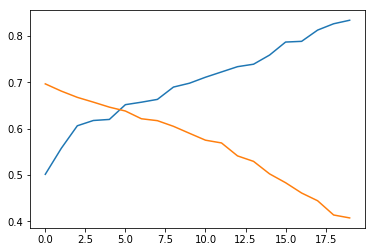

In [46]:
import matplotlib.pyplot as plt
x=[i for i,j in enumerate(hist.history['acc'])]
plt.plot(x, hist.history['acc'])
plt.plot(x, hist.history['loss'])
plt.legend()
plt.show()

__IS THERE AN EASIER WAY TO CLASSIFY PREDICTIONS IN BINARY?__

In [ ]:
print(len(y_test), len(preds))
preds_binary =[]
for i in range(len(preds)):
    preds[i] = [1 if preds[i]>0.5 else 0][0]
        
# y_test ,preds
confusion_matrix(y_test, preds)

## NEW STUFF FOR NEW SEQUENCES

__DIDN'T WORK__

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(X_train_vector, y_train, epochs=10, batch_size=32, verbose=1)

In [ ]:
y_train

### TUTORIAL

In [4]:
# X_train_corpus
docs = ['Well done!', 'Good work','Great effort',
        'nice work', 'Excellent!',
        'Weak','Poor effort!', 'not good', 'poor work',
        'Could have done better.']
# define class labels
# y_train
labels = np.array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='pre')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 0  0  6  2]
 [ 0  0  3  1]
 [ 0  0  7  4]
 [ 0  0  8  1]
 [ 0  0  0  9]
 [ 0  0  0 10]
 [ 0  0  5  4]
 [ 0  0 11  3]
 [ 0  0  5  1]
 [12 13  2 14]]


In [5]:
docs = X_corpus
labels = y
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs[:4])
# pad documents to a max length of 4 words
max_length = 124
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='pre')
print(padded_docs[:4])

[[3, 41, 5, 1, 411, 29, 4, 117, 40], [8, 208, 11, 182, 581, 19], [18, 13, 4, 19, 46], [18, 1266, 1267, 582, 1268, 5, 25, 36, 782, 9, 7, 23, 3, 783, 1269, 358, 209, 58, 29, 118, 412, 22, 1270, 413, 9, 37, 6, 1, 477, 159, 14, 9, 7, 237]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    3   41    5    1  411   29    4  117   40]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  

In [6]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('../../../glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [7]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=124, trainable=False)